# The Sparks Foundation
**Graduate Rotational Internship Program(GRIP) NOVEMBER 21**

**Domain-Data Science and Business Analytics**

**Author - Diksha Khade**

**Task 3 - Perform Exploratory Data Analysis on dataset SampleSuperStore**

**Importing the required libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Reading the dataset and exploring the data**

In [3]:
store_df = pd.read_csv('SampleSuperstore.csv')

In [4]:
store_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
store_df.shape

(9994, 13)

In [6]:
store_df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [7]:
#checking for null values
store_df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
#statistical analysis
store_df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


**Relationship Analysis**

In [10]:
correlation = store_df.corr()

<AxesSubplot:>

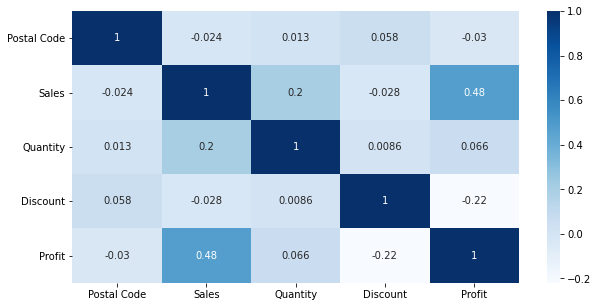

In [16]:
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True,cmap='Blues')

We look here that there is strong correlation between Profit and Sales 

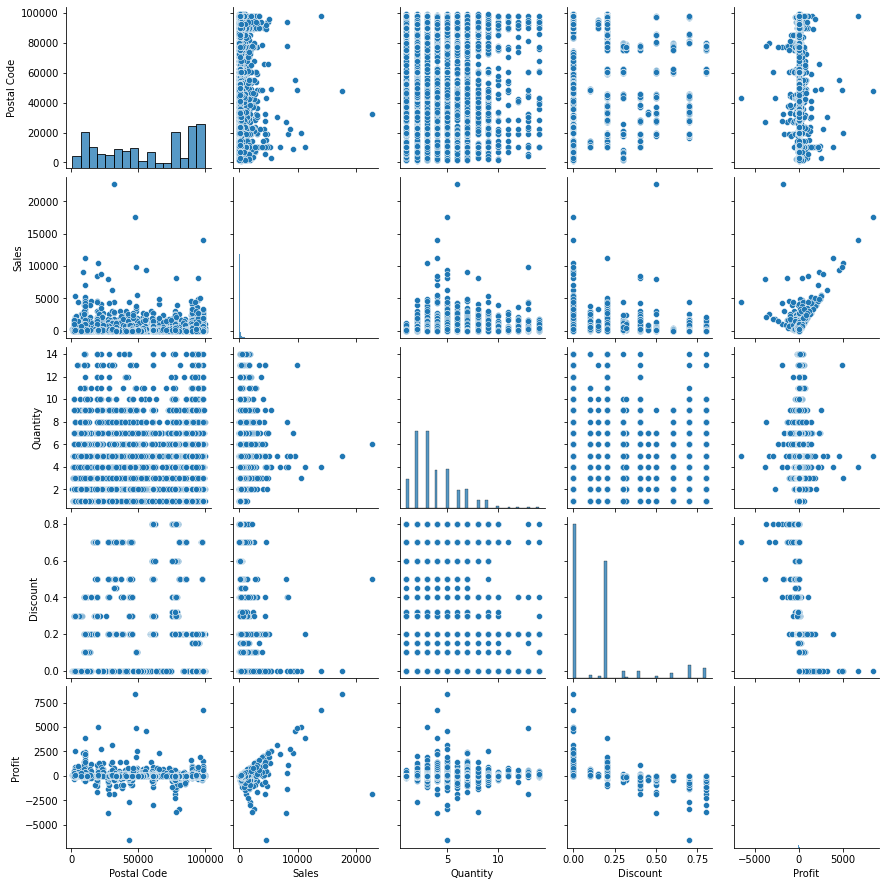

In [12]:
sns.pairplot(store_df)

<BarContainer object of 9994 artists>

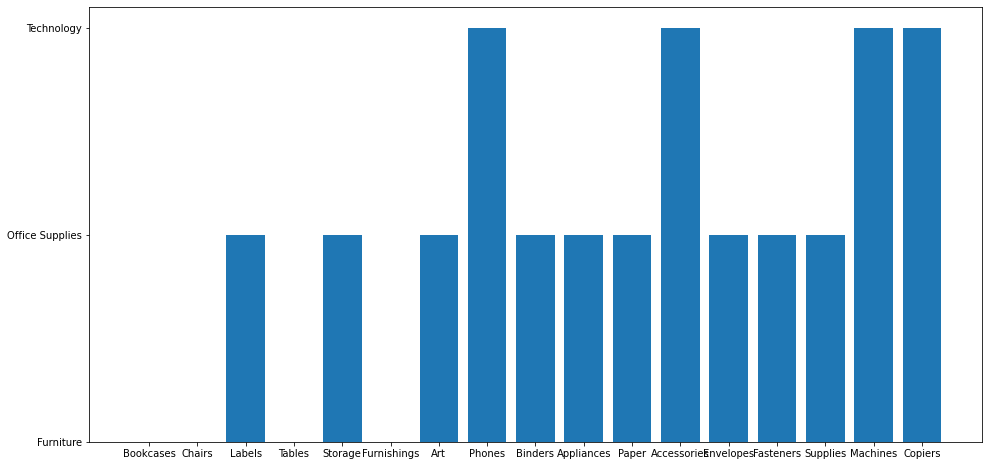

In [21]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=store_df)

From above graph we can understand the different products in the three categories 

<ipython-input-13-da794efc6da5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  store_df.groupby('Sub-Category')['Profit','Sales'].agg(sum).plot.bar()


Text(0.5, 1.0, 'Profits and Sales across Sub-Categories')

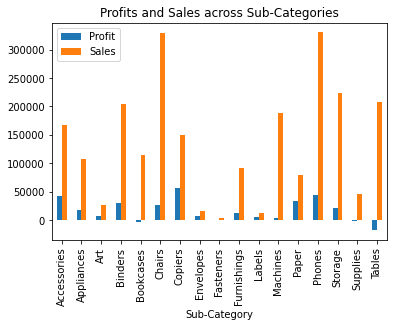

In [13]:
store_df.groupby('Sub-Category')['Profit','Sales'].agg(sum).plot.bar()
plt.title('Profits and Sales across Sub-Categories')

From the above graph ,the profits in copiers are high ,
and the sales of chairs and phones are high among the others 

In [26]:
store_df['Cost'] = store_df['Sales'] - store_df['Profit']
store_df['Profit %'] = (store_df['Profit']/store_df['Cost'])*100

In [30]:
profit_df=store_df.sort_values(['Profit %','Sub-Category'],ascending=False).groupby('Profit %')

In [37]:
profit_df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
1696,Second Class,Home Office,United States,Bayonne,New Jersey,7002,East,Technology,Phones,104.980,2,0.0,52.4900,52.4900,100.000000
2592,Second Class,Corporate,United States,Summerville,South Carolina,29483,South,Technology,Phones,79.100,2,0.0,39.5500,39.5500,100.000000
6338,Standard Class,Corporate,United States,New York City,New York,10035,East,Technology,Phones,87.800,4,0.0,43.9000,43.9000,100.000000
246,Second Class,Home Office,United States,Lakeville,Minnesota,55044,Central,Office Supplies,Paper,47.880,6,0.0,23.9400,23.9400,100.000000
381,First Class,Corporate,United States,San Francisco,California,94109,West,Office Supplies,Paper,50.960,7,0.0,25.4800,25.4800,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,Standard Class,Corporate,United States,Austin,Texas,78745,Central,Office Supplies,Appliances,48.784,4,0.8,-131.7168,180.5008,-72.972973
8766,Standard Class,Corporate,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,24.588,3,0.8,-67.6170,92.2050,-73.333333
9164,Standard Class,Consumer,United States,Chicago,Illinois,60610,Central,Office Supplies,Appliances,143.128,2,0.8,-393.6020,536.7300,-73.333333
261,Standard Class,Corporate,United States,Pasadena,Texas,77506,Central,Office Supplies,Appliances,1.624,2,0.8,-4.4660,6.0900,-73.333333


From the above dataframe it can be observed that 100% profit is recieved through phones and paper

c:\users\diksha\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


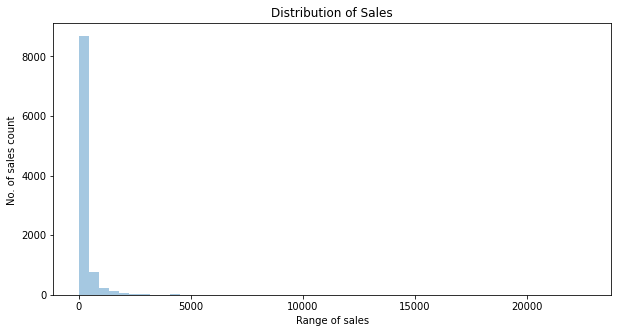

In [26]:
plt.rcParams['figure.figsize']=(10,5)
sns.distplot(store_df['Sales'],kde=False)
plt.title('Distribution of Sales')
plt.xlabel('Range of sales')
plt.ylabel('No. of sales count ')
plt.show()